In [ ]:
import numpy as np  # для матричных вычислений
import pandas as pd  # для анализа и предобработки данных
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для визуализации
from sklearn import linear_model  # линейные модели
from sklearn import metrics  # метрики
from sklearn import preprocessing  # предобработка
from sklearn.model_selection import train_test_split  # разделение выборки

data = pd.read_csv("data/insurance.csv")

charges = "charges"
smoker = "smoker"
sex = "sex"

# кодируем бинарные категориальные признаки
data[smoker] = data[smoker].apply(lambda x: 0 if x == "no" else 1)
data[sex] = data[sex].apply(lambda x: 0 if x == "female" else 1)

# оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)

features = data.drop(charges, axis=1).columns
X, y = data[features], data[charges]

data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/insurance.csv'

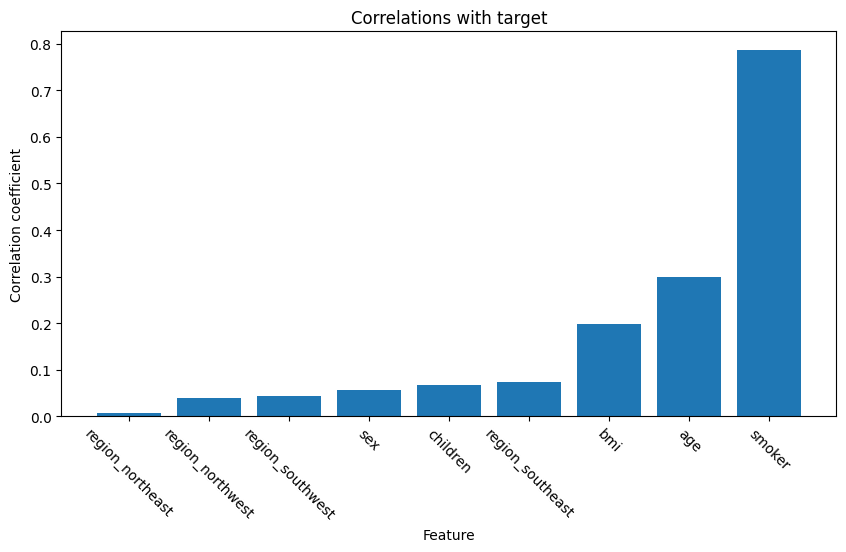

In [ ]:
target = data.corr()[charges].abs().sort_values()

target = target.drop(charges)
# Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5))  # фигура+координатная плоскость
ax.bar(target.index, target.values)  # столбчатая диаграмма
ax.set_title("Correlations with target")  # название графика
ax.set_xlabel("Feature")  # название оси x
ax.set_ylabel("Сorrelation coefficient")  # название оси y
plt.xticks(rotation=-45)

plt.show()

In [ ]:
# Задание 1
random_state = 42
test_present = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_present, random_state=random_state
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

NameError: name 'train_test_split' is not defined

In [ ]:
# Задание 2
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

print("w0:\t{:.3f}".format(lr_model.intercept_))
print("Train R^2:\t{:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2:\t{:.3f}".format(metrics.r2_score(y_test, y_test_predict)))
print(
    "Train MAE:\t{:.0f}".format(metrics.mean_absolute_error(y_train, y_train_predict))
)
print("Test MAE:\t{:.0f}".format(metrics.mean_absolute_error(y_test, y_test_predict)))
print(
    "Train MAPE:\t{:.0f}%".format(
        metrics.mean_absolute_percentage_error(y_train, y_train_predict) * 100
    )
)
print(
    "Test MAPE:\t{:.0f}%".format(
        metrics.mean_absolute_percentage_error(y_test, y_test_predict) * 100
    )
)

w0:	-12390.804
Train R^2:	0.742
Test R^2:	0.784
Train MAE:	4208
Test MAE:	4181
Train MAPE:	42%
Test MAPE:	47%


In [1]:
# Задание 3
fig, ax = plt.subplots(figsize=(12, 6))
y_errors_train = y_train - y_train_predict
y_errors_test = y_test - y_test_predict
errors_df = pd.DataFrame({"train": y_errors_train, "test": y_errors_test})
sns.boxplot(data=errors_df, orient="h", ax=ax)
ax.set_xlabel("Model errors")
ax.set_ylabel("Model")
plt.show()

NameError: name 'plt' is not defined


- A Разброс ошибок на тестовой выборке больше, чем на тренировочной.
- C Медианная ошибка на тренировочной и тестовой выборках отрицательная (меньше 0).

In [ ]:
# Задание 4
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
# Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
# Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
# Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

print(len(X_train_scaled_poly))

(1070, 54)
(268, 54)
1070


In [ ]:
# Задание 5
# Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
# Обучаем модель по МНК
lr_model_poly.fit(X_train_scaled_poly, y_train)
# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_scaled_poly)
# Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_scaled_poly)

print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))

Test R^2: 0.866
Train R^2: 0.842


In [ ]:
# Задание 6
print(np.round(lr_model_poly.coef_, 3))

[-4.66452204e+16 -2.44423905e+15  2.24503196e+15 -1.20160243e+16
 -1.27245309e+15 -1.50448204e+16 -1.05998153e+17 -1.30675881e+16
 -8.04545223e+15  8.36800000e+03  8.30000000e+02  9.04000000e+02
 -1.72800000e+03  2.08000000e+02  4.66452204e+16  4.66452204e+16
  4.66452204e+16  4.66452204e+16  7.14822188e+14  6.88000000e+02
 -1.26675000e+03  2.60000000e+02  1.72941686e+15  1.72941686e+15
  1.72941686e+15  1.72941686e+15 -9.66787500e+03  1.56381200e+03
  5.48636250e+04 -2.24503196e+15 -2.24503196e+15 -2.24503196e+15
 -2.24503196e+15 -2.03200000e+03 -2.22575000e+03  1.20160243e+16
  1.20160243e+16  1.20160243e+16  1.20160243e+16 -1.07347881e+14
  1.37980097e+15  1.37980097e+15  1.37980097e+15  1.37980097e+15
 -8.43754200e+15  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.25157908e+16  0.00000000e+00  0.00000000e+00 -1.04147743e+16
  0.00000000e+00 -1.54369102e+16]


- Регуляризация обнуляет часть коэффициентов, из-за чего для предсказания используются не все признаки.

- Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.

In [ ]:
# Задание 7
# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
# Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
# Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
# Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
# Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
print("Train R^2:\t{:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2:\t{:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))
print(
    "Train MAE:\t{:.0f}".format(
        metrics.mean_absolute_error(y_train, y_train_predict_poly)
    )
)
print(
    "Test MAE:\t{:.0f}".format(
        metrics.mean_absolute_error(y_test, y_test_predict_poly)
    )
)
print(
    "Train MAPE:\t{:.0f}%".format(
        metrics.mean_absolute_percentage_error(y_train, y_train_predict_poly) * 100
    )
)
print(
    "Test MAPE:\t{:.0f}%".format(
        metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100
    )
)

Train R^2:	0.842
Test R^2:	0.867
Train MAE:	2890
Test MAE:	2719
Train MAPE:	29%
Test MAPE:	30%
